In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from scipy import stats 
from astroquery.mast import Catalogs
import math
from astroquery.vizier import Vizier


In [2]:
def create_regionfile(filename, fitsfile,regionname,color):
    x=np.genfromtxt(filename,usecols=0)
    y=np.genfromtxt(filename,usecols=1)
    flux=np.genfromtxt(filename,usecols=2)
    w = WCS(fitsfile)
    print (w)
    ra_wcs=[0]*len(x) #creates a list with x elements
    dec_wcs=[0]*len(x)
    for i in range(len(x)):
        ra_wcs[i], dec_wcs[i] = w.wcs_pix2world(x[i], y[i], 1)
    ra_wcs=np.asarray(ra_wcs)
    dec_wcs=np.asarray(dec_wcs)

    with open(regionname, 'w') as f:
        f.write('global color={0} dashlist=8 3 width=2 font=\"helvetica 10 normal roman\" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'.format(color))
        f.write('fk5 \n')
        for star in range(len(ra_wcs)):
            xval = ra_wcs[star]
            yval = dec_wcs[star]
            f.write('circle({ra},{dec},{radius}")\n'.format(ra=xval, dec=yval,radius=12))
            
    return (ra_wcs,dec_wcs,flux)
    f.close() 


In [3]:
ra_dao,dec_dao,flux_dao=create_regionfile('outputcat_daopy','F15anh.g.101013_53_1933.sw.fits','dao.reg','red')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 14.369206  30.198996  
CRPIX : 3137.0  3134.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259994e-05  6.94444461259994e-05  
NAXIS : 6274  6269


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/astropy/wcs/wcs.py:2873: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


In [4]:
ra_phot,dec_phot,flux_phot=create_regionfile('outputcat_photutils','F15anh.g.101013_53_1933.sw.fits','photutils.reg','green')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 14.369206  30.198996  
CRPIX : 3137.0  3134.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259994e-05  6.94444461259994e-05  
NAXIS : 6274  6269


In [32]:
def compare_phot(ra1, dec1, ra2, dec2): #matches two catalogs
    cf = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
    catalogf = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

    max_sep = 2.0 * u.arcsec
    idxf, d2df, d3df = cf.match_to_catalog_3d(catalogf)
    sep_constraintf = d2df < max_sep
    c_matchesf = cf[sep_constraintf]
    catalog_matchesf = catalogf[idxf[sep_constraintf]]
    print ('Number of matches: ', len(c_matchesf), "out of ", len(cf))
    return ([sep_constraintf],[idxf],d2df)

In [6]:
boolval,idx,d2d=compare_phot(ra_dao,dec_dao,ra_phot,dec_phot)


Number of matches:  262 out of  269


In [7]:
mag_dao=-2.5*np.log10(flux_dao)+27.5
mag_phot=-2.5*np.log10(flux_phot)+27.5

/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [8]:
# len(flux_dao[boolval]),len(flux_phot[idx][boolval])


In [9]:
residuals=mag_dao[boolval]-mag_phot[idx][boolval]


/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecat

<ErrorbarContainer object of 3 artists>

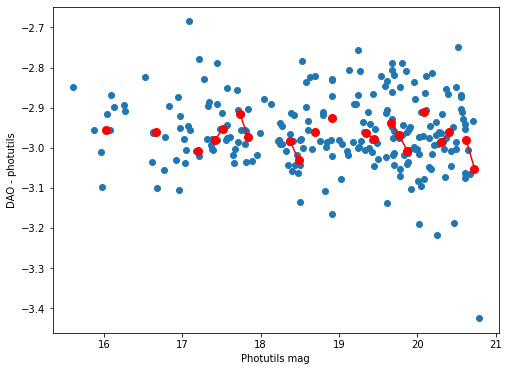

In [10]:
plt.figure(figsize=(8,6))
# plt.scatter(flux_phot[idx][boolval],residual_flux)
plt.scatter(mag_phot[idx][boolval],residuals)
plt.xlabel('Photutils mag')
plt.ylabel('DAO - photutils')


bins=50
count,_,_=stats.binned_statistic(mag_phot[idx][boolval],residuals, 'count', bins=bins)
count_bool=[]
for i in range(len(count)):
        if count[i]>=3:
            count_bool.append(True)
        else:
            count_bool.append(False)

bin_med, edges, binnumber=stats.binned_statistic(mag_phot[idx][boolval],residuals, 'median', bins=bins)

plt.errorbar(((edges[1:]+edges[:-1])/2.)[count_bool],bin_med[count_bool],0,fmt ='r-o',ms=8)


In [11]:
import pickle


with open('new_sex_output.pkl', 'rb') as f:
    data = pickle.load(f)

In [13]:
list(data.keys())

['x',
 'y',
 'fwhm_image',
 'ellipt',
 'flags',
 'class_star',
 'fwhm_world',
 'flux',
 'fluxerr',
 'flag_sn',
 'CXX_IMAGE',
 'CXY_IMAGE',
 'CYY_IMAGE']

In [14]:
list(data.keys())

xpkl=data['x']
ypkl=data['y']

def create_regionfile_pkl( fitsfile,regionname,color):
    x=xpkl
    y=ypkl=data['y']
#     flux=np.genfromtxt(filename,usecols=2)
    w = WCS(fitsfile)
    print (w)
    ra_wcs=[0]*len(x) #creates a list with x elements
    dec_wcs=[0]*len(x)
    for i in range(len(x)):
        ra_wcs[i], dec_wcs[i] = w.wcs_pix2world(x[i], y[i], 1)
    ra_wcs=np.asarray(ra_wcs)
    dec_wcs=np.asarray(dec_wcs)

    with open(regionname, 'w') as f:
        f.write('global color={0} dashlist=8 3 width=2 font=\"helvetica 10 normal roman\" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'.format(color))
        f.write('fk5 \n')
        for star in range(len(ra_wcs)):
            xval = ra_wcs[star]
            yval = dec_wcs[star]
            f.write('circle({ra},{dec},{radius}")\n'.format(ra=xval, dec=yval,radius=6))
            
    return (ra_wcs,dec_wcs)
    f.close() 
rapkl,decpkl= create_regionfile_pkl('F15anh.g.101013_53_1933.sw.fits','pkl.reg','yellow')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 14.369206  30.198996  
CRPIX : 3137.0  3134.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259994e-05  6.94444461259994e-05  
NAXIS : 6274  6269


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
/Users/cesar/anaconda/envs/astroc/lib/python3.7/site-packages/astropy/wcs/wcs.py:2873: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


In [15]:
len(data['x'])

127

In [16]:
catalog_data = Catalogs.query_region("14.33446521 30.25634188", radius=0.2,
                                      catalog="Panstarrs", data_release="dr1", table="mean")
print("Number of results:",len(catalog_data))
print(catalog_data[:10])

Number of results: 50000
         ObjName           objAltName1 objAltName2 objAltName3 ... yMeanApMagStd yMeanApMagNpt yFlags       distance     
-------------------------- ----------- ----------- ----------- ... ------------- ------------- ------ -------------------
PSO J005731.025+300611.069        -999        -999        -999 ...            --             0      0  0.1580858505964608
PSO J005730.767+300608.825        -999        -999        -999 ...            --             0      0  0.1584655719581163
PSO J005730.677+300612.884        -999        -999        -999 ...            --             0      0 0.15729158216155548
PSO J005731.138+300613.267        -999        -999        -999 ...            --             0      0  0.1575944353951112
PSO J005728.757+300612.637        -999        -999        -999 ...            --             0      0 0.15585823480348435
PSO J005729.156+300607.301        -999        -999        -999 ...            --             0  16416 0.15759685045394733

1241

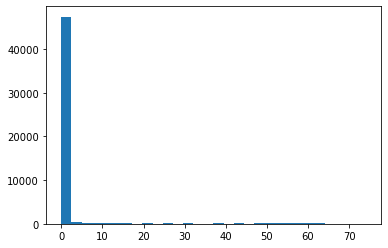

In [17]:
raps1=catalog_data[:]['raMean']
decps1=catalog_data[:]['decMean']
gmag=catalog_data[:]['gMeanPSFMag']

nDet=catalog_data[:]['nDetections']
plt.hist(nDet,bins=30)
gmagind=np.where(gmag>0)

ind=np.where(nDet[gmagind]>10)
len(raps1[ind])


In [18]:
                   
# gmag = gmag[gmag.mask == False]  
# gmagn

In [19]:
raps1=raps1[ind]
decps1=decps1[ind]

In [20]:
catalog_data.colnames

['ObjName',
 'objAltName1',
 'objAltName2',
 'objAltName3',
 'objID',
 'uniquePspsOBid',
 'ippObjID',
 'surveyID',
 'htmID',
 'zoneID',
 'tessID',
 'projectionID',
 'skyCellID',
 'randomID',
 'batchID',
 'dvoRegionID',
 'processingVersion',
 'objInfoFlag',
 'qualityFlag',
 'raStack',
 'decStack',
 'raStackErr',
 'decStackErr',
 'raMean',
 'decMean',
 'raMeanErr',
 'decMeanErr',
 'epochMean',
 'posMeanChisq',
 'cx',
 'cy',
 'cz',
 'lambda',
 'beta',
 'l',
 'b',
 'nStackObjectRows',
 'nStackDetections',
 'nDetections',
 'ng',
 'nr',
 'ni',
 'nz',
 'ny',
 'gQfPerfect',
 'gMeanPSFMag',
 'gMeanPSFMagErr',
 'gMeanPSFMagStd',
 'gMeanPSFMagNpt',
 'gMeanPSFMagMin',
 'gMeanPSFMagMax',
 'gMeanKronMag',
 'gMeanKronMagErr',
 'gMeanKronMagStd',
 'gMeanKronMagNpt',
 'gMeanApMag',
 'gMeanApMagErr',
 'gMeanApMagStd',
 'gMeanApMagNpt',
 'gFlags',
 'rQfPerfect',
 'rMeanPSFMag',
 'rMeanPSFMagErr',
 'rMeanPSFMagStd',
 'rMeanPSFMagNpt',
 'rMeanPSFMagMin',
 'rMeanPSFMagMax',
 'rMeanKronMag',
 'rMeanKronMagEr

In [21]:
with open('ps1.reg', 'w') as f:
        f.write('global color={0} dashlist=8 3 width=2 font=\"helvetica 10 normal roman\" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'.format('yellow'))
        f.write('fk5 \n')
        for star in range(len(raps1)):
            xval = raps1[star]
            yval = decps1[star]
            f.write('circle({ra},{dec},{radius}")\n'.format(ra=xval, dec=yval,radius=6))

In [22]:
catalog_data[0]

ObjName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,distance
str26,str4,str4,str4,int64,int64,int64,uint8,int64,int64,uint8,int64,uint8,float64,int64,int64,uint8,int64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64
PSO J005731.025+300611.069,-999,-999,-999,144120143792904276,916324000027801,199638669880472,0,17219822049627,14412,1,1933,53,0.503303621433027,916324,46482,3,268959744,32,--,--,--,--,14.37927323,30.10307485,0.19801999628543854,0.19801999628543854,55815.42278935,--,0.838022802876962,0.21484457455887215,0.5015571658752946,25.327514218544678,22.006355532938883,124.49524838200327,-32.75022020838383,--,0,1,0,0,1,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,0.812982976436615,21.478099822998047,0.1974470019340515,--,1,21.478099822998047,21.478099822998047,--,--,--,0,22.383499145507812,0.1974470019340515,--,1,4120,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,0.1580858505964608


In [23]:
def getPS1cat4table ():
# Assume a table of observations, check RA/DEC to make sure overlapping
    ra = '0:57:30.673'
    dec = '+30:14:19.993'
    c = SkyCoord(ra, dec, unit=(u.hourangle, u.degree), frame='icrs')
    

    # Download a catalog for the first coordinate with a large enough radius to
    # overlap with all catalogs
    radius = 1
    RAboxsize = DECboxsize = 0.6
    Mmax = 22.0

    # get the maximum 1.0/cos(DEC) term: used for RA cut
    minDec = c.dec.degree-0.5*DECboxsize
    if minDec<=-90.0:minDec=-89.9
    maxDec = c.dec.degree+0.5*DECboxsize
    if maxDec>=90.0:maxDec=89.9

    invcosdec = max(1.0/math.cos(c.dec.degree*math.pi/180.0),
                            1.0/math.cos(minDec  *math.pi/180.0),
                            1.0/math.cos(maxDec  *math.pi/180.0))

    ramin = c.ra.degree-0.5*RAboxsize*invcosdec
    ramax = c.ra.degree+0.5*RAboxsize*invcosdec
    decmin = c.dec.degree-0.5*DECboxsize
    decmax = c.dec.degree+0.5*DECboxsize
    vquery = Vizier(columns=['RAJ2000', 'DEJ2000',
                             'gmag', 'e_gmag',
                             'rmag', 'e_rmag',
                             'imag', 'e_imag',
#                              'zmag', 'e_zmag',
#                              'ymag', 'e_ymag',
                            'gKmag','e_gKmag',
                            'rKmag','e_rKmag',
                            'iKmag','e_iKmag',
                            'objID'],
    #                         'zKmag','e_zKmag',
    #                         'yKmag','e_yKmag'],
                    column_filters={'gmag':
                                    ('<%f' % Mmax)},
                    row_limit=100000)

    tbdata = vquery.query_region(c, width=('%fd' % radius),
                catalog='II/349/ps1')[0]
    tbdata.rename_column('RAJ2000', 'ra_ps1')
    tbdata.rename_column('DEJ2000', 'dec_ps1')
    tbdata.rename_column('gmag', 'PS1_g')
    tbdata.rename_column('e_gmag', 'PS1_g_err')
    tbdata.rename_column('rmag', 'PS1_r')
    tbdata.rename_column('e_rmag', 'PS1_r_err')
    tbdata.rename_column('imag', 'PS1_i')
    tbdata.rename_column('e_imag', 'PS1_i_err')
    tbdata.rename_column('objID', 'PS1_ID')


    mask = ((tbdata['ra_ps1']<ramax) & (tbdata['ra_ps1']>ramin) &
            (tbdata['dec_ps1']<decmax) & (tbdata['dec_ps1']>decmin) & (tbdata['PS1_i']-tbdata['iKmag']<0.05) )
    tbdata = tbdata[mask]

    # Mask table
    for key in tbdata.keys():
        if key not in ['ra_ps1','dec_ps1']:
            tbdata[key] = [str(dat) for dat in tbdata[key]]
    print (len(tbdata))
    return(tbdata)

In [24]:
viziertable=getPS1cat4table()

1735


In [25]:
viziertable

ra_ps1,dec_ps1,PS1_g,PS1_g_err,PS1_r,PS1_r_err,PS1_i,PS1_i_err,gKmag,e_gKmag,rKmag,e_rKmag,iKmag,e_iKmag,PS1_ID
deg,deg,,,,,,,,,,,,,
float64,float64,str7,str6,str7,str6,str7,str6,str7,str6,str7,str6,str7,str6,str18
14.075058940,29.943273050,15.5122,0.0058,15.1049,0.0013,14.9178,0.0008,15.5345,1e-04,15.1361,0.003,14.9808,0.0023,143930140750192533
14.064887690,29.954520240,18.4951,0.005,17.3174,0.0028,16.6396,0.0035,18.5734,0.0117,17.3796,0.0055,16.6968,0.0055,143940140648846022
14.065327130,29.940516100,21.9467,0.1675,21.9171,0.2341,21.5239,0.1704,20.4353,0.1062,--,--,21.4822,0.3099,143920140652529204
14.055183240,29.940505820,19.4903,0.0138,19.2254,0.0097,19.0752,0.0096,19.5704,0.0164,19.3333,0.0228,19.1638,0.0148,143920140551769207
14.102143420,29.953630920,21.2255,0.078,20.8076,0.0363,20.5051,0.0346,20.9859,0.2055,20.7781,0.0405,20.5563,0.0445,143940141021534965
14.070594300,29.950186540,20.4981,0.0173,19.5996,0.0145,19.2125,0.0094,20.4859,0.0885,19.6626,0.0045,19.2959,0.0242,143940140705970840
14.083395060,29.975465550,20.7443,0.083,21.7194,0.1123,21.4957,0.0443,20.2796,0.061,21.6014,0.2094,21.5252,0.1263,143970140832761239
14.078977400,29.970775730,20.1611,0.0573,20.0891,0.0233,19.7892,0.0331,20.2014,0.0842,20.1784,0.0294,19.9105,0.0382,143960140789825553


In [26]:
# viziertable
ravizierps1=viziertable['ra_ps1']
decvizierps1=viziertable['dec_ps1']

In [27]:
with open('vizierps1.reg', 'w') as f:
        f.write('global color={0} dashlist=8 3 width=2 font=\"helvetica 10 normal roman\" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n'.format('red'))
        f.write('fk5 \n')
        for star in range(len(ravizierps1)):
            xval = ravizierps1[star]
            yval = decvizierps1[star]
            f.write('circle({ra},{dec},{radius}")\n'.format(ra=xval, dec=yval,radius=6))

In [28]:
len(ravizierps1)
ravizierps1=np.asarray(ravizierps1)
decvizierps1=np.asarray(decvizierps1)

ravizierps1

array([14.07505894, 14.06488769, 14.06532713, ..., 14.40912683,
       14.58936688, 14.24309389])

In [31]:
len(rapkl),len(ravizierps1)



(127, 1735)

In [33]:
compare_phot(rapkl,decpkl,ravizierps1,decvizierps1)

Number of matches:  29 out of  127


([array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True,  True,
          True,  True, False,  True,  True, False, False,  True, False,
         False,  True,  True,  True, False, False,  True,  True,  True,
          True, False,  True, False,  True, False, False, False, False,
          True,  True, False,  True,  True,  True, False, False,  True,
         False, False, False, False, False,  True, False,  True, False,
         False, False,  True, False, False, False, False,  True,  True,
         False, False, False,  True, False, False, False, False, False,
          True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,